In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Ejercicio 1 -   Regresión Lineal Univariada

En este ejercicio, tu objetivo será implementar el método `forward` de un modelo de Regresión Lineal Univariada (es decir, con una sola variable de entrada). No debés implementar ningún otro método.

La función se encuentra en la clase `RegresionLinealUnivariada`.

Luego, ejecuta las pruebas para verificar que implementaste correctamente el modelo.




In [11]:

import numpy as np

class RegresionLinealUnivariada:
    '''
    Esta clase permite entrenar modelos de regresión lineal univariada, cuya función de predicción es:
    y = w x + b
    Los parámetros w y b son números flotantes
    La entrada x debe ser unidimensional.
    '''

    def __init__(self,w:float,b:float=0):
        self.w=w
        self.b=b
    
    def __repr__(self):
        return f"{self.__class__.__name__}(w = {self.w:.5f}, b = {self.b:.5f})"

    def forward(self,x:np.ndarray):
        '''
        :param x: vector 1D con valores de entrada
        :return: la predicción x*w+b
        '''
        assert (len(x.shape) == 1)

        n=len(x)
        y=np.zeros(n)
            
        # TODO calcular la salida y en base a: x, self.w, y self.b
        y = self.w*x+self.b
        # FIN TODO
        assert len(y) == n, "La cantidad de elementos de y es distinta de la de x"

        return y
    
    def backward(self,x:np.ndarray,y_true:np.ndarray)->(float,float):
        '''
        Calcula las derivadas de los parámetros del modelo con respecto 
        al error cuadrático medio y al conjunto de datos (x,y)
        No necesitas implementar nada aqui
        :param x: vector 1D con los valores de entrada
        :param y: vector 1D con los valores de salida _verdaderos_ 
        :return derivada del error respecto de w y b
        '''
        
        y = self.forward(x)
        # calculo de derivadas
        dEdw = 2 * ((y - y_true) * x).mean()
        dEdb = 2 * (y - y_true).mean()
        return dEdw,dEdb

    def fit(self,x:np.ndarray,y:np.ndarray,lr:float=0.001,epochs:int=100):
        '''
        No necesitas implementar nada aqui
        Entrena el modelo (ajusta los parámetros) para minimizar el error cuadrático medio
        Utilizando descenso de gradiente 
        :param x: vector 1D con los valores de entrada
        :param y: vector 1D con los valores de salida _verdaderos_ 
        :param lr: velocidad de aprendizaje (learning rate)
        :param epochs: cantidad de iteraciones de aprendizaje
        '''
        
        assert (len(x.shape) == 1)
        assert (len(y.shape) == 1)
        assert ( len(y) == len(x))
        n = len(x)

        for i in range(epochs):
            dEdw,dEdb=self.backward(x,y)
            # actualizo los parámetros
            self.w = self.w - lr * dEdw
            self.b = self.b - lr * dEdb
            print(f"Epoch {i+1}/{epochs} => Error = {self.error(x,y)}")
        
    def error(self,x:np.ndarray,y_true:np.ndarray)->float:
        '''
        Error cuadrático medio (MSE) del modelo
        :param x: vector 1D con los valores de entrada
        :param y: vector 1D con los valores de salida _verdaderos_ 
        :return flotante con el error promedio del modelo entre todos los ejemplos
        '''
        
        y = self.forward(x)
        d2 = (y_true-y)**2
        return d2.mean()
    

# Ejecuta el siguiente bloque para verificar que la función `forward` está bien implementada

Cuando todos los vectores son iguales a los esperados, quiere decir que está bien implementado el forward.

In [12]:
import utils

rl1=RegresionLinealUnivariada(w_inicial=0,b=0.0)
print(rl1.w,rl1.b)

x=np.array([1.0,2.0,3.0])
y=rl1.forward(x)
# utils.verificar_igualdad(y,np.zeros(3))



# rl2=RegresionLinealUnivariada(w=1.0,b=0.0)
# y=rl2.forward(x)
# utils.verificar_igualdad(y,x)

# rl3=RegresionLinealUnivariada(w=0.0,b=1.0)
# y=rl3.forward(x)
# utils.verificar_igualdad(y,np.ones(3))


# rl4=RegresionLinealUnivariada(w=1.0,b=1.0)
# y=rl4.forward(x)
# utils.verificar_igualdad(y,np.ones(3)+x)


1.0 0.0


NameError: name 'w' is not defined

# Verifica que el modelo se entrena correctamente.
Utilizando la función `fit` vamos a entrenar el modelo con los datos `x` e `y`. 

* Primero, se crea el modelo inicializando con valores aleatorios de `w` y `b`. 
* Luego se visualiza el modelo inicial con los parámetros aleatorios.
* Después se entrena el modelo con descenso de gradiente con `fit`
* Finalmente, se visualiza el modelo final con los parámetros optimizados.

**Nota:** El entrenamiento _no_ va a funcionar si no está implementada la función forward más arriba.

Inicialización aleatoria del modelo; vuelve a correr esta celda para obtener otros resultados
Epoch 1/200 => Error = 40.566842105263156
Epoch 2/200 => Error = 40.566842105263156
Epoch 3/200 => Error = 40.566842105263156
Epoch 4/200 => Error = 40.566842105263156
Epoch 5/200 => Error = 40.566842105263156
Epoch 6/200 => Error = 40.566842105263156
Epoch 7/200 => Error = 40.566842105263156
Epoch 8/200 => Error = 40.566842105263156
Epoch 9/200 => Error = 40.566842105263156
Epoch 10/200 => Error = 40.566842105263156
Epoch 11/200 => Error = 40.566842105263156
Epoch 12/200 => Error = 40.566842105263156
Epoch 13/200 => Error = 40.566842105263156
Epoch 14/200 => Error = 40.566842105263156
Epoch 15/200 => Error = 40.566842105263156
Epoch 16/200 => Error = 40.566842105263156
Epoch 17/200 => Error = 40.566842105263156
Epoch 18/200 => Error = 40.566842105263156
Epoch 19/200 => Error = 40.566842105263156
Epoch 20/200 => Error = 40.566842105263156
Epoch 21/200 => Error = 40.566842105263156
Epoch 22/200

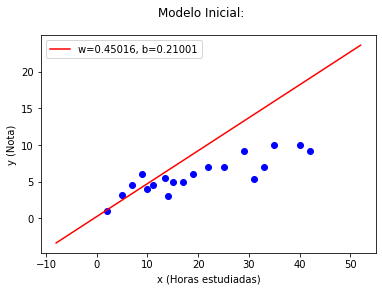

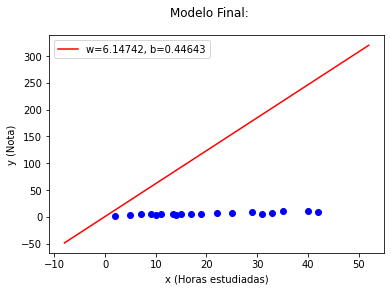

In [8]:
# Carga del dataset
import os
dataset_path ="study_regression_small.csv"

data=np.loadtxt(open(dataset_path, "rb"), delimiter=",", skiprows=1)
x,y=data[:,0],data[:,1]

print("Inicialización aleatoria del modelo; vuelve a correr esta celda para obtener otros resultados")
w_random=np.random.rand()
b_random=np.random.rand()
rl=RegresionLinealUnivariada(w_random,b_random)

# visualiza el modelo inicial aleatorio y los datos
utils.plot_regresion_lineal_univariada(rl.w,rl.b,x,y,title="Modelo Inicial: ")

# entrena el modelo
rl.fit(x,y,lr=0.0001,epochs=200)

#visualiza el modelo entrenado
utils.plot_regresion_lineal_univariada(rl.w,rl.b,x,y,title="Modelo Final: ")
